# Sea level fingerprints

In this practical, we will look further into sea level fingerprints. The emphasis is on understanding their form and not on the manner in which they are calculated. 

We start by importing the necessary Python modules, setting some options for plotting, and getting values for some physical parameters:

In [23]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi


#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]


b = SL.b        # radius of the Earth
g = SL.g        # surface gravitational acceleration
G = SL.G        # gravitational constant
rhoi = SL.rhoi  # density of ice
rhow = SL.rhow  # density of water

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading in the initial sea level and ice thickness

Within the code below we load in models of present day sea level and ice thickness. This is taken from the **ice6g** model of:

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014JB011176

The values of the fields are interpolated onto a grid at the chosen expansion order, $L$. We can understand 
$L$ as a non-dimensional maximum wavenumber, meaning the higher we take $L$ the more spatial details will be present. A value of $L = 128$ is sufficient for our applications, but $L = 256$ is preferable if you have a sufficiently fast laptop. Note that reading in and interpolating the model files can take some time.

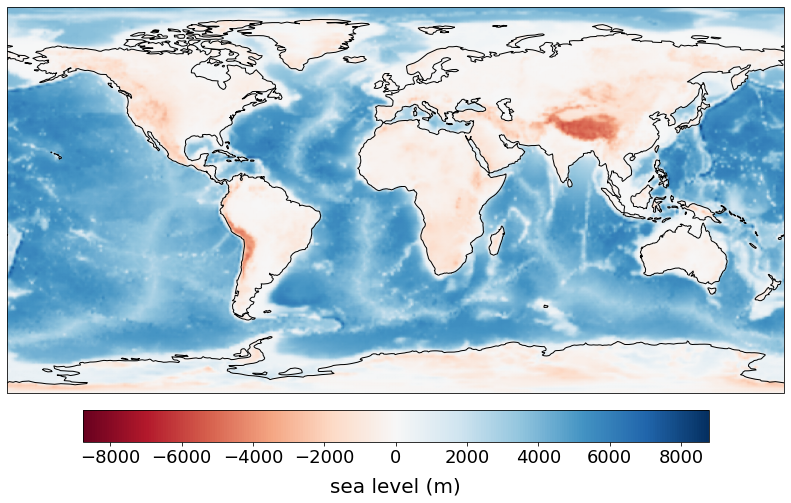

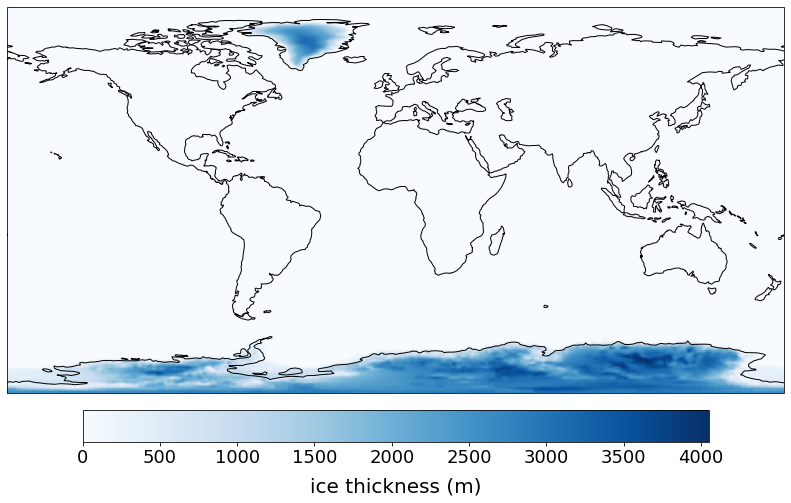

In [24]:
# set the truncation degree
L=256

# read in the present day sea level and ice thickness
sl0,ice0 = SL.get_sl_ice_data(L)

# plot these fields
SL.plot(sl0,label = 'sea level (m)')
SL.plot(ice0,label = 'ice thickness (m)',clim_pos = True)

## Forming the ocean function and calculating the ocean area

Using the sea level and ice model, we can form the **ocean function** which is defined to equal one where 
water is present and zero otherwise. 

One point worth mentioning is that in regions where ice shelves are present the ocean function is taken to equal 
one. This is because, to a good approximation, there is a local isostatic balance between the ice and the underlying oceans. As a result, melting of an ice shelf has no effect on sea level within the hydrostatic theory.

The code below constructs and plots the ocean function. It then uses it to determine the ocean area. 

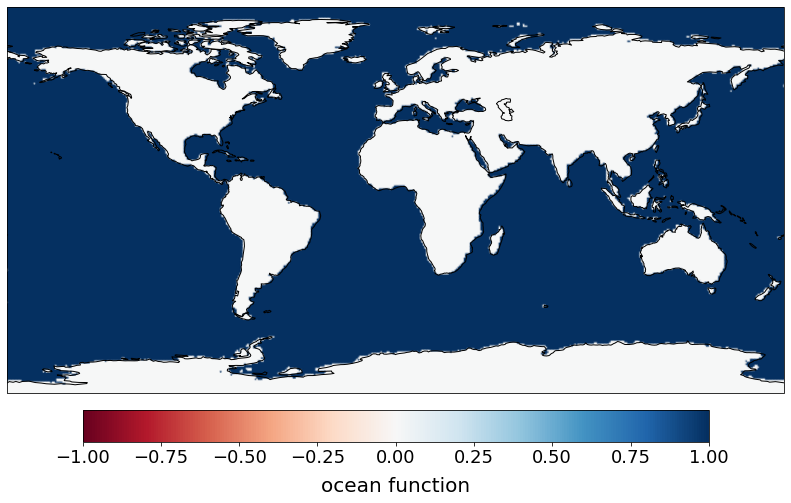

In [25]:
# compute the ocean function
C = SL.ocean_function(sl0,ice0)
SL.plot(C,label = 'ocean function')

# Compute the ocean area
A = SL.surface_integral(C)

## Exercise 1

Determine the fraction of the Earth's surface covered by water. 

In [26]:
# Space for the solution of Exercise 1

## Computing the Greenland fingerprint

Our aim to to compute a sea level fingerprint for the Greenland ice sheet. To do this we need to specify the 
melt geometry. There are difference ways that this can be done, with the form of the resulting fingerprint differing slightly as a result. For simplicity, we will melt the entire ice sheet, with the resulting change of ice thickness shown below

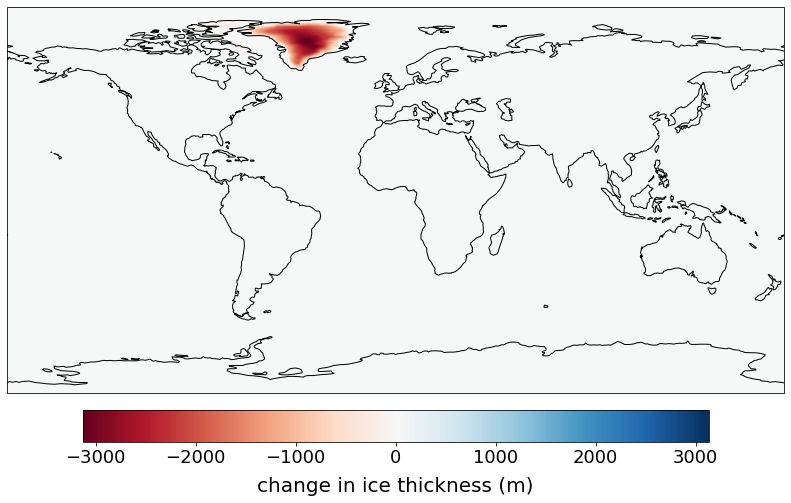

In [27]:
DIce = -1*SL.zero_southern_hemisphere(ice0)
SL.plot(DIce,label = 'change in ice thickness (m)')

As a first step, we can apply the bathtub model to determine the average sea level change over the oceans. 
Recall from the lecture that for this model the sea level change can be written

$
\Delta SL = \frac{\Delta M}{\rho_{w} A},
$

where $\Delta M$ is the mass of ice that has gone into the oceans. 

## Exercise 2

Use the above formula to determine the average sea level change associated with melting the Greenland ice sheet. In doing this, the function `surface_integral()` from `SLmod.py` will be useful.  This function takes as its argument a function on our grid for the Earth's surface and returns its integral. It is also useful to note that functions defined on this grid can be multiplied by scalars in the obvious manner. For example

```
zeta = rhoi*DIce
```

defines a new function, `zeta`, on the grid that is equal to `DIce` multiplied by the density of ice. 

In [28]:
# Space for the solution of Exercise 2

To determine the full fingerprint, it is necessary to solve the sea level equation. This is done by the function `fingerprint` from `SLmod.py`. This function takes as arguments the ocean function, $C$, and the 
**direct load** which in this case is give  by

$
\zeta = \rho_{i}\, (1-C)\, \Delta I.
$

Note that the inclusion of the ocean function means that changes in ice thickness linked to ice shelves are not included within the calculation. 

iteration =  1 relative change =  0.020723110335743852
iteration =  2 relative change =  0.002510476772858636
iteration =  3 relative change =  0.0004208320892951851
iteration =  4 relative change =  8.31403847310176e-05
iteration =  5 relative change =  1.810156496616519e-05
iteration =  6 relative change =  4.250490111916757e-06
iteration =  7 relative change =  1.071048656882874e-06
iteration =  8 relative change =  2.8804745804909877e-07
iteration =  9 relative change =  8.237299501047483e-08
iteration =  10 relative change =  2.5198820282311914e-08
iteration =  11 relative change =  7.851044013329502e-09


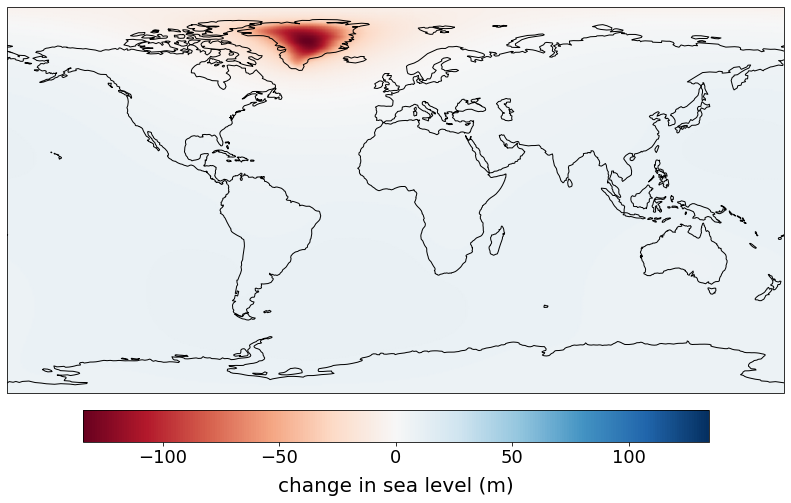

In [29]:
# Define the direct load
zeta = rhoi*(1-C)*DIce

# Solve the sea level equation
sl,u,phi,om,psi = SL.fingerprint(C,zeta)

# Plot the sea level change
SL.plot(sl,label = 'change in sea level (m)')

The sea level equation is solved using an iterative scheme which stops when the relative change 
between iterations falls below a chosen value (in this case taken to be $10^{-8}$). 

The plot above shows the sea level change globally. We can focus on the change within the oceans by masking out values on land:

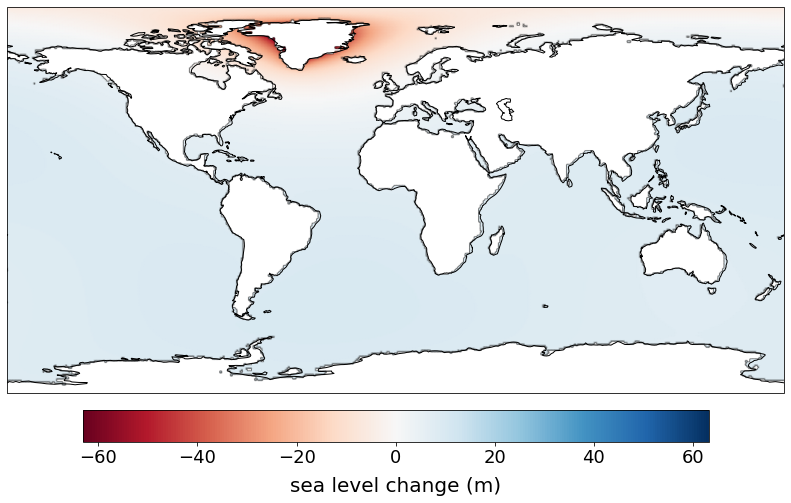

In [30]:
# get the ocean mask
ocean_mask = SL.ocean_mask(sl0,ice0)

# plot sea level just in the oceans
SL.plot(ocean_mask*sl,label = 'sea level change (m)')

The function `fingerprint` returns more than just the sea level change. Looking at the relevant code above, we see that it also returns variables here named: `u`, `phi`, `om`, and `psi`. The first is the vertical motion of the ground, the second is the gravitational potential perturbation, the third is the perturbation to the rotation vector, and the final one is the perturtation to the centrifugal potential. 

## Exercise 3

The sea level change associated with the vertical displacement, $u$, is equal to $-u$, while that linked to the gravitational potential perturbation, $\phi$, is $-\phi / g$ where $g$ is the surface gravitational acceleration.

Verify that $-\phi/g$ does have units of length. 

Plot both  $-u$ and $-\phi / g$ to examine their relative contributions. 




In [31]:
# Space for solution of Exercise 3

## Exercise 4

When plotting sea level fingerprints, values are usually normalised by the average sea level change over the oceans. Using that result of your early calculation with the bathtub model, make such a plot in this case. 

In [32]:
# Space for solution of Exercise 4

## Exercise 5

The function `fingerprint` has an optional third argument `rotation` determined whether rotational feedbacks are included within the numerical calculations. This parameter is set to `True` by default. Repeat the fingerprint calculations with rotation feedbacks turned off, and estimate the relative importance of this process. 

In [33]:
# Space for solution of Exercise 5

## Exercise 6

We can determine a fingerprint for the whole of the Antarctic ice sheet by taking:

```
DIce = -1*SL.zero_northern_hemisphere(ice0)
```

Determine the sea level fingerprint in this case.  

For an Antarctic fingerprint, we can alternatively consider a uniform melting rate across the ice sheet using:

```
DIce = -1*SL.antarctica_mask(sl0,ice0,val = 0)
```

Form the fingerprint in this case, and examine the differences resulting from the choice of melt-geometry.

In [34]:
# Space to solve Exercise 6